# Gradient Descent
From previous lecture, we know that, in order to achieve a precise approximation for any given dataset, we define a "Loss Function" and try to minimize it. In the case of linear regression we used Mean Squared Error (MSE). Let's see how MSE changes by changing coefficients of linear equation Y=AX+B

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

Start with creating a sample dataset.

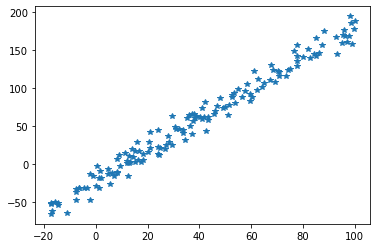

In [3]:
A = 2
B = -20
x_range = [-20, 100]

def load_dataset(n=150):
  x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
  eps = np.random.normal(0,10,n)
  y = A * x  + B + eps
  return np.array(y).reshape(-1,1), np.array(x).reshape(-1,1)

y, x = load_dataset()

plt.plot(x,y,'*')
plt.show()

Now, lets define our loss function.

In [4]:
def loss(y_train,y_pred):
    return np.average((y_train-y_pred)**2)

Our aim is minimizing the defined loss function, let's examine how it varies by changing coefficients of equation. First, keep B constant, and observe how A affects loss.

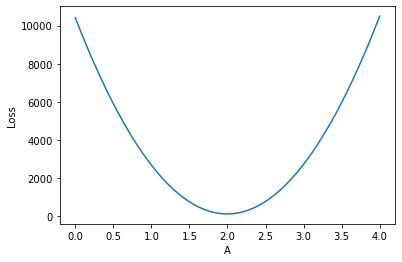

In [5]:
b=-20
loss_values = np.zeros(y.shape)
a_values = np.zeros(y.shape)
for i,a in enumerate(np.linspace(0,4,y.shape[0])):
    a_values[i][0] = a
    y_pred= a*x+b
    loss_values[i][0] = loss(y_pred,y)

plt.xlabel('A')
plt.ylabel('Loss')
plt.plot(a_values,loss_values)
plt.show()
    


Now, we can do the same thing while keeping A constant.

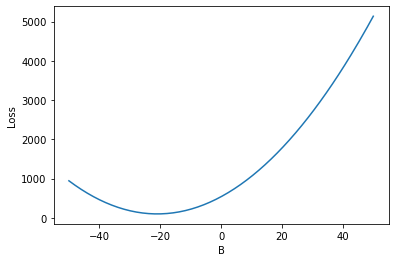

In [6]:
a=2
loss_values = np.zeros(y.shape)
b_values = np.zeros(y.shape)
for i,b in enumerate(np.linspace(-50,50,y.shape[0])):
    b_values[i][0] = b
    y_pred= a*x+b
    loss_values[i][0] = loss(y_pred,y)

plt.xlabel('B')
plt.ylabel('Loss')
plt.plot(b_values,loss_values)
plt.show()

For both cases, a clear parabolic relationship between coefficients and loss is observed. However, for simplicty we iterate over those values one by one. The real loss function graph for this problem can be imagined as a valley-like surface. As number of coefficients and variables increase, the complexity of loss function increases, too. While we can easily find the 0-derivate points using partial derivatives of defined loss function and coefficients, the problem becomes harder to solve for more complex systems, so we need another method.

Let's assume that we have a robot which is blind on a valley and it is trying to find the lowest point it can get. In order to achieve that it can use slope of the surface it is standing, and move where it goes downwards. For visual simplicity, we will assume that B is constant. <br>From loss function we can derive: $$L=\frac{1}{N}\sum \left( Ax_i+B-y_i \right)^2$$ 
$$\frac{\partial L}{\partial A}=\frac{1}{N}\sum \left[2x_i\left( Ax_i+B-y_i \right)\right]$$
$$\frac{\partial L}{\partial A}=\frac{1}{N}\left[2A\sum x_i^2 + 2B\sum x_i - 2\sum x_iy_i\right]$$ 

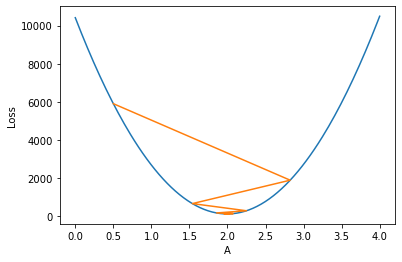

In [7]:
b=-20
loss_values = np.zeros(y.shape)
a_values = np.zeros(y.shape)
for i,a in enumerate(np.linspace(0,4,y.shape[0])):
    a_values[i][0] = a
    y_pred= a*x+b
    loss_values[i][0] = loss(y_pred,y)

def derivative(a,b,x,y):
    return (2*a*np.sum(x**2)+2*b*np.sum(x)-2*np.sum(x*y))/x.shape[0]

step_count = 10
learning_rate = 0.0003
# Define initial value
a=0.5
loss_history = np.zeros((step_count+1,1))
a_history = np.zeros((step_count+1,1))
loss_history[0][0] = loss(a*x+b,y)
a_history[0][0] = a
for step in range(step_count):
    a -= learning_rate*derivative(a,b,x,y)
    loss_history[step+1][0] = loss(a*x+b,y)
    a_history[step+1][0] = a
    

plt.xlabel('A')
plt.ylabel('Loss')
plt.plot(a_values,loss_values,a_history,loss_history)
plt.show()

Our robot can succesfully converge to minimum point in this simple environment.

<font color='red'>**Exercise**</font>  <br>
By using the code snippet above, change learning rate. Explain what problems may occur by setting a non-suitable learning rate.




-When I increase the learning rate, it misses the minimum point. If I decrease the learning rate, the algorithm will take very little steps so that it will need too much time and iteration to reach the minimum point.

However, we have 2 variables in this problem, so we need to consider both values. While we can visualize 1 variable and loss with a simple 2D graph, we need to observe a 3D surface in order to get the grasp of the situation.

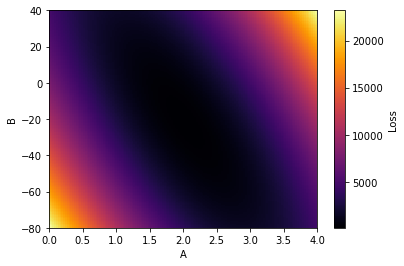

In [8]:
loss_values = np.zeros((y.shape[0],y.shape[0]))
a_values = np.zeros((y.shape[0],y.shape[0]))
b_values = np.zeros((y.shape[0],y.shape[0]))

for i,a in enumerate(np.linspace(0,4,y.shape[0])):
    for j,b in enumerate(np.linspace(-80,40,y.shape[0])):
        a_values[i][j] = a
        b_values[i][j] = b
        y_pred= a*x+b
        loss_values[i][j] = loss(y_pred,y)

cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots()
im = ax.pcolormesh(a_values, b_values, loss_values, cmap=cmap)
ax.set_ylabel('B')
ax.set_xlabel('A')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Loss')

Now we neet to perform gradient descent on this 3D surface. 
$$L=\frac{1}{N}\sum \left( Ax_i+B-y_i \right)^2$$ 
$$\frac{\partial L}{\partial B}=\frac{1}{N}\sum \left[2\left( Ax_i+B-y_i \right)\right]$$
$$\frac{\partial L}{\partial B}=\frac{1}{N}\left[2A\sum x_i + 2B\times N - 2\sum y_i\right]$$ 

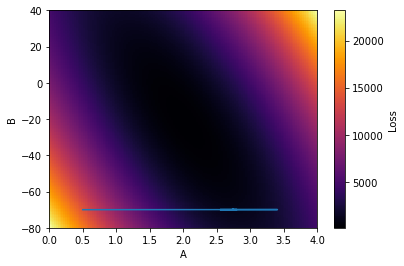

In [9]:
loss_values = np.zeros((y.shape[0],y.shape[0]))
a_values = np.zeros((y.shape[0],y.shape[0]))
b_values = np.zeros((y.shape[0],y.shape[0]))

for i,a in enumerate(np.linspace(0,4,y.shape[0])):
    for j,b in enumerate(np.linspace(-80,40,y.shape[0])):
        a_values[i][j] = a
        b_values[i][j] = b
        y_pred= a*x+b
        loss_values[i][j] = loss(y_pred,y)

cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots()
im = ax.pcolormesh(a_values, b_values, loss_values, cmap=cmap)
ax.set_ylabel('B')
ax.set_xlabel('A')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Loss')

def derivative(a,b,x,y):
    der_a = (2*a*np.sum(x**2)+2*b*np.sum(x)-2*np.sum(x*y))/x.shape[0]
    der_b = (2*a*np.sum(x)-2*np.sum(y))/x.shape[0] + 2*b
    return der_a, der_b

step_count = 10
learning_rate = 0.00025
# Define initial value
a=0.5
b=-70
a_history = np.zeros((step_count+1,1))
b_history = np.zeros((step_count+1,1))
a_history[0][0] = a
b_history[0][0] = b
for step in range(step_count):
    der_a , der_b = derivative(a,b,x,y)
    a -= learning_rate*der_a
    b -= learning_rate*der_b
    a_history[step+1][0] = a
    b_history[step+1][0] = b

ax.plot(a_history,b_history)

As it is observed, when same learning rate is applied one of the variables does not converge. If we change the learning rate we can observe algortihm finds the minimum point.

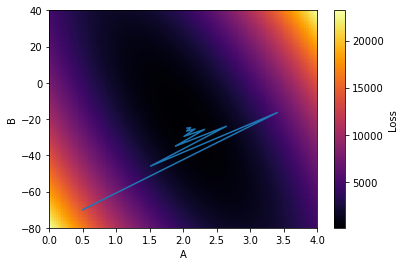

In [10]:
loss_values = np.zeros((y.shape[0],y.shape[0]))
a_values = np.zeros((y.shape[0],y.shape[0]))
b_values = np.zeros((y.shape[0],y.shape[0]))

for i,a in enumerate(np.linspace(0,4,y.shape[0])):
    for j,b in enumerate(np.linspace(-80,40,y.shape[0])):
        a_values[i][j] = a
        b_values[i][j] = b
        y_pred= a*x+b
        loss_values[i][j] = loss(y_pred,y)

cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots()
im = ax.pcolormesh(a_values, b_values, loss_values, cmap=cmap)
ax.set_ylabel('B')
ax.set_xlabel('A')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Loss')

def derivative(a,b,x,y):
    der_a = (2*a*np.sum(x**2)+2*b*np.sum(x)-2*np.sum(x*y))/x.shape[0]
    der_b = (2*a*np.sum(x)-2*np.sum(y))/x.shape[0] + 2*b
    return der_a, der_b

step_count = 10
learning_rate = 0.00025
# Define initial value
a=0.5
b=-70
a_history = np.zeros((step_count+1,1))
b_history = np.zeros((step_count+1,1))
a_history[0][0] = a
b_history[0][0] = b
for step in range(step_count):
    der_a , der_b = derivative(a,b,x,y)
    a -= learning_rate*der_a
    b -= learning_rate*der_b*1000
    a_history[step+1][0] = a
    b_history[step+1][0] = b

ax.plot(a_history,b_history)

However, defining different learning rates for different variables is not an efficient solution. Instead, we use normalization on the dataset. By doing so, we achieve a uniform gradient map. Normailization is the process of fitting input and output variables in range of 0-1. 

In [11]:
x_min = x.min()
x_max = x.max()
y_min = y.min()
y_max = y.max()

x = (x-x_min)/(x_max-x_min)
y = (y-y_min)/(y_max-y_min)

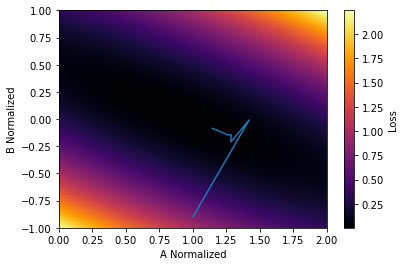

In [12]:
loss_values = np.zeros((y.shape[0],y.shape[0]))
a_values = np.zeros((y.shape[0],y.shape[0]))
b_values = np.zeros((y.shape[0],y.shape[0]))

for i,a in enumerate(np.linspace(0,2,y.shape[0])):
    for j,b in enumerate(np.linspace(-1,1,y.shape[0])):
        a_values[i][j] = a
        b_values[i][j] = b
        y_pred= a*x+b
        loss_values[i][j] = loss(y_pred,y)

cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots()
im = ax.pcolormesh(a_values, b_values, loss_values, cmap=cmap)
ax.set_ylabel('B Normalized')
ax.set_xlabel('A Normalized')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Loss')

def derivative(a,b,x,y):
    der_a = (2*a*np.sum(x**2)+2*b*np.sum(x)-2*np.sum(x*y))/x.shape[0]
    der_b = (2*a*np.sum(x)-2*np.sum(y))/x.shape[0] + 2*b
    return der_a, der_b

step_count = 10
learning_rate = 0.5
# Define initial value
a = 1
b= -0.9
a_history = np.zeros((step_count+1,1))
b_history = np.zeros((step_count+1,1))
a_history[0][0] = a
b_history[0][0] = b
for step in range(step_count):
    der_a , der_b = derivative(a,b,x,y)
    a -= learning_rate*der_a
    b -= learning_rate*der_b
    a_history[step+1][0] = a
    b_history[step+1][0] = b

ax.plot(a_history,b_history)

Figure above shows that, when the datapoints are in range of 0-1, more uniform gradient is achieved and gradient descent performs better.

<font color='red'>**Exercise**</font>  <br>
There is another feature scaling method called standardization. Learn and explain what standardization is and how it compares versus normalization. <br>
Repeat the process above using standardization instead of normalization.

In the normalization, the values are being rescaled between 0 and 1. On the other hand, in the standardization, the values are being rescaled with an average of 0 and standard variation of 1.

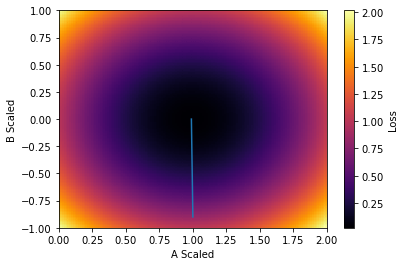

In [13]:
x_std = x.std()
x_mean = x.mean()
y_std = y.std()
y_mean = y.mean()
x = (x-x_mean) / x_std
y = (y-y_mean) / y_std
loss_values = np.zeros((y.shape[0],y.shape[0]))
a_values = np.zeros((y.shape[0],y.shape[0]))
b_values = np.zeros((y.shape[0],y.shape[0]))

for i,a in enumerate(np.linspace(0,2,y.shape[0])):
    for j,b in enumerate(np.linspace(-1,1,y.shape[0])):
        a_values[i][j] = a
        b_values[i][j] = b
        y_pred= a*x+b
        loss_values[i][j] = loss(y_pred,y)

cmap = plt.get_cmap('inferno')
fig, ax = plt.subplots()
im = ax.pcolormesh(a_values, b_values, loss_values, cmap=cmap)
ax.set_ylabel('B Scaled')
ax.set_xlabel('A Scaled')
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Loss')

def derivative(a,b,x,y):
    der_a = (2*a*np.sum(x**2)+2*b*np.sum(x)-2*np.sum(x*y))/x.shape[0]
    der_b = (2*a*np.sum(x)-2*np.sum(y))/x.shape[0] + 2*b
    return der_a, der_b

step_count = 10
learning_rate = 0.5
# Define initial value
a = 1
b= -0.9
a_history = np.zeros((step_count+1,1))
b_history = np.zeros((step_count+1,1))
a_history[0][0] = a
b_history[0][0] = b
for step in range(step_count):
    der_a , der_b = derivative(a,b,x,y)
    a -= learning_rate*der_a
    b -= learning_rate*der_b
    a_history[step+1][0] = a
    b_history[step+1][0] = b

ax.plot(a_history,b_history)

##  <font color='green'>Load Boston house data and observe the parameters and linear correlation between them</font> 

In [14]:

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
print("Boston housing dataset prediction.")
boston = load_boston()

print(boston.DESCR)

print(type(boston))
print('\n')
print(boston.keys())
print('\n')
print(boston.data.shape)
print('\n')
print(boston.feature_names)



Boston housing dataset prediction.
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rat

In [16]:
x, y = boston.data, boston.target
print('Data Feature Training size',x.shape)
print('Data Output size',y.shape)

Data Feature Training size (506, 13)
Data Output size (506,)


### Let`s look at the correlation matrix for this data 
 <font color='red'>Question:</font> name the the best direct and inverse linear correlation to PRICE 

- RM (average number of rooms per dwelling) is the feature that has best direct linear correlation to price.

- LSTAT (% lower status of the population) is the best inverse one.


<AxesSubplot:>

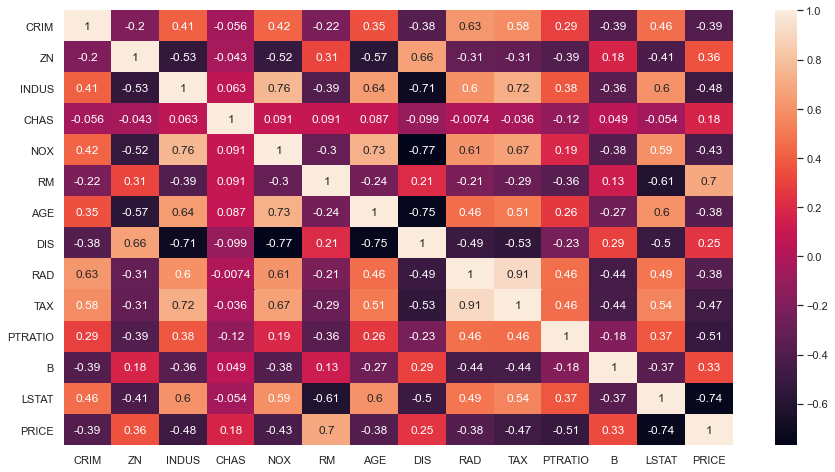

In [17]:
import pandas as pd

bos_data = pd.DataFrame(boston.data, columns = boston.feature_names)
bos_data['PRICE']=boston.target

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=bos_data.corr(), annot=True)


##  <font color='green'>Preprocessing</font> 
### Splitting the data into training and testing sets
Since we need to test our model, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data.

<font color='red'>Question:</font> What does random_state do? and try to run the code without applying scale() or StandardScaler(), you will see that the algorithm will have a hard time to converge to a solution as explained above. In this following example, we use standardization but feel free to try it with normalization too. <br>
*Hint: Check the official documentation.*

-If I dont specify the random_state, the values in the training and test sets will change in every execution of the code. In contrast, if I assign an integer to random_state, my test and training set wont change no matter how many times I run the code. But, the integer is important here because I will obtain another accuracy values for another numbers. BUT, I dont understand how to choose that integer.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state=8)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


s=StandardScaler()
train_data=s.fit_transform(X_train)
test_data=s.transform(X_test)

print(train_data.shape)
print(test_data.shape)



(379, 13)
(127, 13)
(379,)
(127,)
(379, 13)
(127, 13)


## <font color='green'>Set up SGD_Regressor hyperparameters</font>  
We have fitted multivariate linear regression model to the Boston House data. See SGDRegDefault.coef_ below, you will realize 13 parameters defining this equation
$$y=a_1x_1+a_2x_2+a_3x_3+a_4x_4+a_5x_5+a_6x_6+a_7x_7+a_8x_8+a_9x_9+a_{10}x_{10}+a_{11}x_{11}+a_{12}x_{12}+a_{13}x_{13}+b.$$

 

In [19]:

from sklearn import linear_model

SGDRegDefault = linear_model.SGDRegressor(max_iter=20) #all parameters are default
SGDRegDefault.fit(train_data, Y_train)

#SGDReg =linear_model.SGDRegressor(
#   max_iter = 1000,penalty = "l1",loss = 'huber',tol = 1e-3, alpha=0.0001 ,learning_rate='optimal' ,average = True)
#SGDReg.fit(train_data, Y_train)




score = SGDRegDefault.score(train_data, Y_train)
print("R-squared_train_forDefaultParameters:", score)
#score = SGDReg.score(train_data, Y_train)
#print("R-squared_train:", score)


score = SGDRegDefault.score(test_data, Y_test)
print("R-squared_test_forDefaultParameters:", score)
#score = SGDReg.score(test_data, Y_test)
#print("R-squared_test:", score)

#mse = mean_squared_error(ytest, ypred)


R-squared_train_forDefaultParameters: 0.7425523356277377
R-squared_test_forDefaultParameters: 0.7119487979131621


In [20]:
SGDRegDefault.coef_

array([-0.86140916,  0.93338469, -0.13979819,  0.68861806, -1.14237937,
        2.80725676, -0.23149594, -2.72876411,  1.43103111, -0.90705428,
       -1.86800722,  0.85249956, -3.99882793])

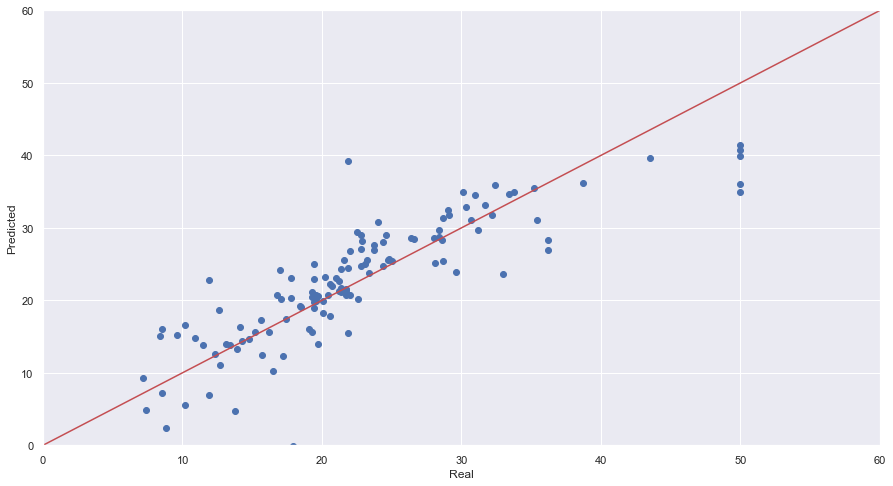

In [21]:
Y_predict=SGDRegDefault.predict(test_data)


fig = plt.figure()
plt.scatter(Y_test,Y_predict)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot([0,60],[0,60],'r')

<font color='red'>Question:</font> Compare this coefficient values to the correlation matrix above, what is the coeffients for RM and LSTAT. 


<font color='red'>Question:</font> Default mode in a function uses some set hyperparameters. However, a function is never limited with those hyperparameters. Check out to sklearn.linear_model.SGDRegressor see the parameters on sciket learn website. 

Device your own function by appropriately changing hyperparameters. Try to justify why you think as a set of hyperparameters works better if you can a better one than the default.

In [22]:
bos_data.drop(['PRICE'] , axis = 1 , inplace = True)

In [23]:
listt = []
for i in range(13):
    listt.append((SGDRegDefault.coef_[i], bos_data.columns[i]))
print(listt)

[(-0.8614091592816218, 'CRIM'), (0.9333846907889446, 'ZN'), (-0.1397981855617264, 'INDUS'), (0.6886180633711598, 'CHAS'), (-1.1423793724686457, 'NOX'), (2.807256759666613, 'RM'), (-0.23149593786914607, 'AGE'), (-2.7287641140666343, 'DIS'), (1.4310311124790698, 'RAD'), (-0.9070542789465471, 'TAX'), (-1.8680072224711306, 'PTRATIO'), (0.8524995556351227, 'B'), (-3.9988279319068782, 'LSTAT')]


(2.739014462866011, 'RM')

(-3.990985071097958, 'LSTAT') 

As I indicated and the heatmap showed above, Rm is the feature that has the biggest coeff and the best direct linear correlation with the price.
LSTAT has the best inverse linear correlation with the price. The absolute value of the coeff of that feature is higher than all features. Although it is inverse, I think it is very important for our model.

In [24]:
from sklearn import linear_model

sgd_reg = linear_model.SGDRegressor(loss='squared_loss', penalty='elasticnet', alpha=0.0001, l1_ratio=0.2,
                                    max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.005, random_state=42, 
                                    learning_rate='invscaling', eta0=0.01, power_t=0.25, early_stopping=True, 
                                    validation_fraction=0.05, n_iter_no_change=10, warm_start=False, average=False)
sgd_reg.fit(train_data , Y_train)
score = sgd_reg.score(train_data , Y_train)
print("train data score : " , score)
score = sgd_reg.score(test_data , Y_test)
print("test data score : " , score)

train data score :  0.7401612053981848
test data score :  0.7084404656770854


When I changed loss to huber, the accuracy becomes terrible. I dont know why.

I changed everything without knowing aything. I am going to try again with hyperparameters more like default.

I want to try elastic net for regularization. Also, I want to use constant learning rate. I dont want to use anything too complicated.

In [25]:
sgd_reg = linear_model.SGDRegressor(penalty='elasticnet', learning_rate = 'constant' , eta0 = 0.005,
                                    max_iter=1000, random_state=42)
sgd_reg.fit(train_data , Y_train)
score = sgd_reg.score(train_data , Y_train)
print("train data score : " , score)
score = sgd_reg.score(test_data , Y_test)
print("test data score : " , score)

train data score :  0.7419766984053207
test data score :  0.7129182330454584


I obtained very close accuracy values.

# <font color='green'> Nonlinear SGD</font>  

The more complex your equation is, the more sensitive your analysis becomes for the hyperparameters. When we increased the multivariate polynomial degree to 2, the R2 became negative infinity in this case. Apparently, the algorithm cannot find a local min and gets lost.

In [26]:
from sklearn.preprocessing import PolynomialFeatures

####
N_poly_degree=2
####

poly = PolynomialFeatures(N_poly_degree)

train_data_poly=poly.fit_transform(train_data)
test_data_poly=poly.fit_transform(test_data)

SGDRegDefault = linear_model.SGDRegressor(max_iter=50) #all parameters are default
SGDRegDefault.fit(train_data_poly, Y_train)



score_train = SGDRegDefault.score(train_data_poly, Y_train)
print("R-squared_train:", score_train)

score_test = SGDRegDefault.score(test_data_poly, Y_test)
print("R-squared_test:", score_test)

R-squared_train: -1.1676135372008875e+17
R-squared_test: -1.0000718073714827e+17


In [27]:
SGDRegDefault.coef_

array([ 2.93379027e+07, -1.10877557e+08, -2.55010992e+07,  2.18951349e+07,
       -2.87712344e+07,  8.46366651e+07,  2.75459731e+08,  3.53489507e+07,
       -1.66480533e+06,  5.72639541e+06,  1.74309288e+07, -4.18534428e+07,
        6.13299632e+07, -2.77791999e+07,  3.13673615e+06,  5.81295799e+07,
       -1.08302976e+08,  3.07359964e+07,  8.84065729e+06,  5.55700886e+08,
       -9.05775645e+07,  1.59870910e+08, -1.73561029e+08, -1.62040169e+08,
       -7.09268120e+07,  5.02050397e+08, -3.63528647e+08, -9.95402520e+07,
        3.00078206e+07,  2.04827570e+07, -1.57725898e+07,  8.68138078e+06,
        3.41909101e+06, -7.39846711e+07,  1.28314774e+07, -1.21445658e+07,
       -5.97877662e+06, -2.74321483e+07, -6.28451305e+06,  6.38433619e+07,
       -3.29812675e+07,  7.37901167e+07, -4.61625154e+07,  4.34312246e+07,
        1.39819808e+07, -1.01572668e+07,  6.05353381e+07,  2.40912217e+07,
        5.80662853e+07,  9.00432148e+07, -6.88667855e+07, -1.37977419e+08,
        6.66097460e+07, -

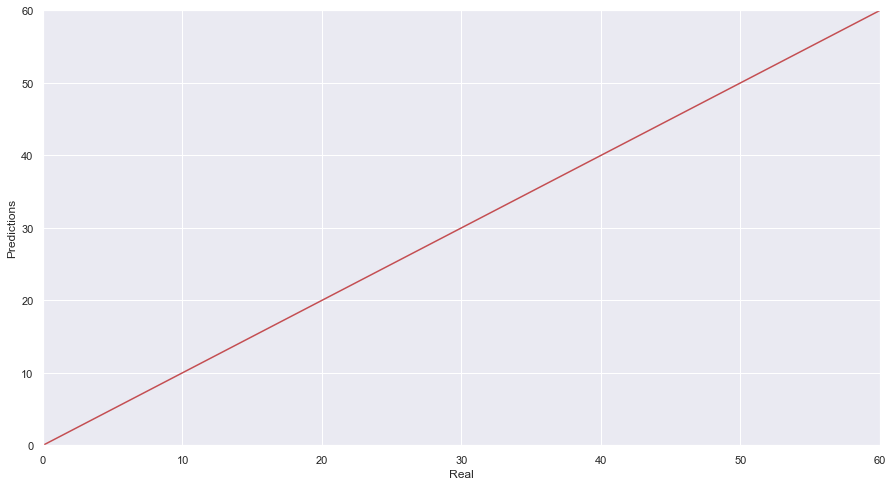

In [28]:
Y_predict=SGDRegDefault.predict(test_data_poly)

fig = plt.figure()
plt.scatter(Y_test,Y_predict)
plt.xlabel('Real')
plt.ylabel('Predictions')
plt.xlim(0,60)
plt.ylim(0,60)
plt.plot([0,60],[0,60],'r')

 <font color='red'> Question:</font>  Check out SGDRegDefault.coef_ and compare it to the linear model where there are 13 coefficients for 13 parameters 
 
Why do you think that number of coefficients is so drastically increased. Give a few examples of terms in this second degree nonlinear example. 

<font color='red'> Question:</font>  Use various hyperparameters and loss evaluations to converge to a solution. There is a solution found by us for polynomial degree two. You can read the SGDRegressor hyperparameter definitions to make educated guesses.

Increase in the number of coefficients is an expected situation since we create and add extra features by using polynomial regression. For example, instead of y = ax+b , now we are using y = ax**2 + bx + c . The number of coefficients is increasing from 2 to 3.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

####
N_poly_degree=2
####

poly = PolynomialFeatures(N_poly_degree)

train_data_poly=poly.fit_transform(train_data)
test_data_poly=poly.fit_transform(test_data)

SGDRegDefault = linear_model.SGDRegressor(max_iter=1000 , penalty = 'l1' , learning_rate = 'constant',
                                         eta0 = 0.0004 , random_state = 42 )
SGDRegDefault.fit(train_data_poly, Y_train)



score_train = SGDRegDefault.score(train_data_poly, Y_train)
print("R-squared_train:", score_train)

score_test = SGDRegDefault.score(test_data_poly, Y_test)
print("R-squared_test:", score_test)

R-squared_train: 0.9048308029526565
R-squared_test: 0.8373272028847677


-I want to try L1 regularization since it has an effect to push the coefficients toward 0 and eliminates some features that has little effect on the result. It is called feature selection and I think L1 regularization could work because I have a lot of coefficients due to the polynomial regression. I reduced the number of features.

-Also, I have no idea about the type of the learning rate, but keeping it constant makes me feel safe. I set the learning rate as 0.001, but after some trials I found that the 0.0004 is a very good constant for the learning rate.

-In final, the accuracy increased.

# Feedback
If there are any part which is not clear to you, you can write down your questions here.


I dont understand why the slope between predictions and real values is equal to one in the last graph. Are the all the values predicted correctly?